<a href="https://colab.research.google.com/github/Imran012x/butterfly/blob/main/BF_%20Transfer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Lab -->> Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")

#Data Preprocessing

In [ ]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data_bf_224_8k.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import random

In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")



import os
import random
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define class names and their directories
classes = ['common', 'painted', 'red_based', 'red_spot']
data_dir = '/content/'  # Base directory containing class folders

# Define the number of images to select per class
image_limits = {
    'common': 600,
    'painted': 500,
    'red_based': 600,
    'red_spot': 400
}

# Function to process images with a limit
def load_images(class_name, max_images):
    image_path = os.path.join(data_dir, class_name)
    images = sorted(os.listdir(image_path))
    random.shuffle(images)  # Shuffle for randomness
    selected_images = images[:max_images]  # Select only the required number

    return [np.array(Image.open(os.path.join(image_path, img)).resize((224, 224)).convert('RGB')) for img in selected_images]

# Load images and labels
data, labels = [], []
for idx, class_name in enumerate(classes):
    class_images = load_images(class_name, image_limits[class_name])  # Apply limit
    data.extend(class_images)
    labels.extend([idx] * len(class_images))

# Convert to numpy arrays
X = np.array(data)
Y = np.array(labels)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


X_train_scaled = X_train/255
X_test_scaled = X_test/255

# Print dataset information
print(f"Class counts: {dict(zip(*np.unique(Y, return_counts=True)))}")
print(f"Shapes - X: {X.shape}, X_train: {X_train.shape}, X_test: {X_test.shape}")

Class counts: {0: 600, 1: 500, 2: 600, 3: 400}
Shapes - X: (2100, 224, 224, 3), X_train: (1680, 224, 224, 3), X_test: (420, 224, 224, 3)


#Optuna-Hyper parameter Training

In [ ]:
# !pip install optuna
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#Unsupervised Learning

In [ ]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import zipfile
# import os
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet50 import preprocess_input

# # Set Random Seed for Reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# # 📌 Extract the ZIP File
# zip_file = "/content/drive/MyDrive/mixed.zip"  # Update this path
# extract_folder = "butterfly_dataset"

# if not os.path.exists(extract_folder):
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(extract_folder)

# # 📌 Generate Labels from Filenames
# image_folder = "butterfly_dataset/mixed"  # Path where images are stored

# # Get all image filenames
# image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))]



# # Load images and preprocess them for feature extraction
# img_size = (224, 224)
# images = []
# for img_file in image_files:
#     img_path = os.path.join(image_folder, img_file)
#     img = load_img(img_path, target_size=img_size)
#     img_array = img_to_array(img)  # Convert image to array
#     img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
#     images.append(img_array)

# # Convert list of images into a numpy array
# images = np.array(images)

# # Ensure the shape is correct (num_images, height, width, channels)
# print(f"Image shape: {images.shape}")

# # 📌 Use Pre-trained ResNet50 for Feature Extraction
# resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# resnet_model.trainable = False  # Freeze the layers

# # Extract features from the images
# features = resnet_model.predict(np.array(images), batch_size=32)

# # Flatten the features for clustering
# features_flat = features.reshape(features.shape[0], -1)



# # 📌 Apply KMeans Clustering to Group Images into Clusters (Pseudo-Labels)
# num_clusters = 4  # Set the number of clusters (adjust as needed)
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# pseudo_labels = kmeans.fit_predict(features_flat)

# # 📌 Create a DataFrame with the pseudo-labels
# df = pd.DataFrame({'filename': image_files, 'label': pseudo_labels})

# # Split into train and validation sets (80% train, 20% validation)
# from sklearn.model_selection import train_test_split
# train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# # 📌 Image Data Augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # 📌 Load Data from DataFrame (Single Folder)
# batch_size = 32

# train_df["label"] = train_df["label"].astype(str)
# val_df["label"] = val_df["label"].astype(str)

# train_generator = datagen.flow_from_dataframe(
#     train_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# val_generator = datagen.flow_from_dataframe(
#     val_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # 📌 CNN Model Definition
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.3),
#     Dense(num_clusters, activation='softmax')  # Number of clusters as output classes
# ])

# # 📌 Compile the Model
# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # 📌 Train the Model
# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=100, batch_size=batch_size, verbose=1)

# # 📌 Evaluate the Model
# val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# # 📌 Plot Training vs Validation Accuracy/Loss
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training & Validation Accuracy")

# plt.subplot(1,2,2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training & Validation Loss")
# plt.show()

# # 📌 Generate Predictions for Test Data
# y_true = val_generator.classes
# y_pred = np.argmax(model.predict(val_generator), axis=1)

# # 📌 Confusion Matrix & Performance Metrics
# conf_matrix = confusion_matrix(y_true, y_pred)
# acc = accuracy_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# # 📌 Plot Confusion Matrix Heatmap
# plt.figure(figsize=(6,5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# # 📌 Classification Report
# print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# # 📌 Save Model
# model.save("butterfly_classifier.h5")










# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import cv2
# import os
# from tensorflow.keras.preprocessing import image
# from google.colab import files  # Use this for Google Colab

# # 📌 Load the trained model
# model = tf.keras.models.load_model("butterfly_classifier.h5")

# # 📌 Define class names (must match the folder names used during training)
# class_names = ['common', 'painted', 'red_based', 'red_spot']  # Modify if needed

# # 📌 Function to Upload & Predict
# def upload_and_predict():
#     uploaded = files.upload()  # Opens a file uploader dialog

#     for filename in uploaded.keys():
#         # Load and preprocess the image
#         img_path = filename
#         img = image.load_img(img_path, target_size=(224, 224))  # Resize image
#         img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
#         img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

#         # 📌 Make Prediction
#         prediction = model.predict(img_array)
#         predicted_class = np.argmax(prediction)  # Get the class index
#         class_label = class_names[predicted_class]

#         # 📌 Display Image with Prediction
#         plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
#         plt.title(f"Predicted: {class_label}")
#         plt.axis("off")
#         plt.show()

#         print(f"🔹 Model Prediction: {class_label} (Confidence: {max(prediction[0]) * 100:.2f}%)")

# # 📌 Run the function
# upload_and_predict()

#Ensemble Learning

Training ResNet50...
Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7433 - loss: 0.7343

220/220 ━━━━━━━━━━━━━━━━━━━━ 75s 174ms/step - accuracy: 0.7438 - loss: 0.7328 - val_accuracy: 0.1244 - val_loss: 1.7855 - learning_rate: 1.0000e-04
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 145ms/step - accuracy: 0.9614 - loss: 0.1219 - val_accuracy: 0.1909 - val_loss: 2.2593 - learning_rate: 1.0000e-04
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.9801 - loss: 0.0643 - val_accuracy: 0.4773 - val_loss: 1.9402 - learning_rate: 1.0000e-04
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.9883 - loss: 0.0438 - val_accuracy: 0.6352 - val_loss: 1.8173 - learning_rate: 1.0000e-04
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9924 - loss: 0.0269

220/220 ━━━━━━━━━━━━━━━━━━━━ 33s 151ms/step - accuracy: 0.9924 - loss: 0.0269 - val_accuracy: 0.9511 - val_loss: 0.2086 - learning_rate: 1.0000e-04
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.9958 - loss: 0.0159 - val_accuracy: 0.9415 - val_loss: 0.2714 - learning_rate: 1.0000e-04
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9952 - loss: 0.0176

220/220 ━━━━━━━━━━━━━━━━━━━━ 33s 151ms/step - accuracy: 0.9952 - loss: 0.0176 - val_accuracy: 0.9960 - val_loss: 0.0101 - learning_rate: 1.0000e-04
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 147ms/step - accuracy: 0.9974 - loss: 0.0064 - val_accuracy: 0.9795 - val_loss: 0.0758 - learning_rate: 1.0000e-04
Epoch 9/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.9972 - loss: 0.0103 - val_accuracy: 0.9892 - val_loss: 0.0407 - learning_rate: 1.0000e-04
Epoch 10/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 147ms/step - accuracy: 0.9944 - loss: 0.0211 - val_accuracy: 0.9801 - val_loss: 0.0552 - learning_rate: 1.0000e-04
ResNet50 validation accuracy: 0.9801
Training InceptionV3...
Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 87s 125ms/step - accuracy: 0.6346 - loss: 0.9939 - val_accuracy: 0.9170 - val_loss: 0.2475 - learning_rate: 1.0000e-04
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9526 - loss: 0.1594 - val_accuracy: 0.9455 - val_loss: 0.1808 - learning_rate: 1.0000e

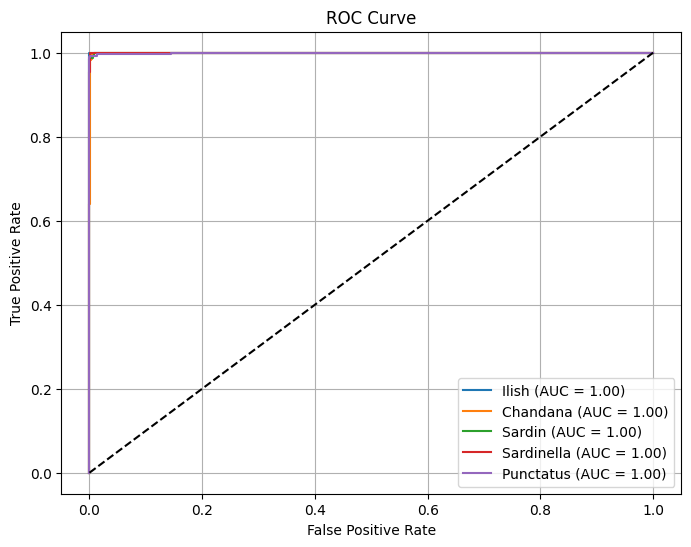

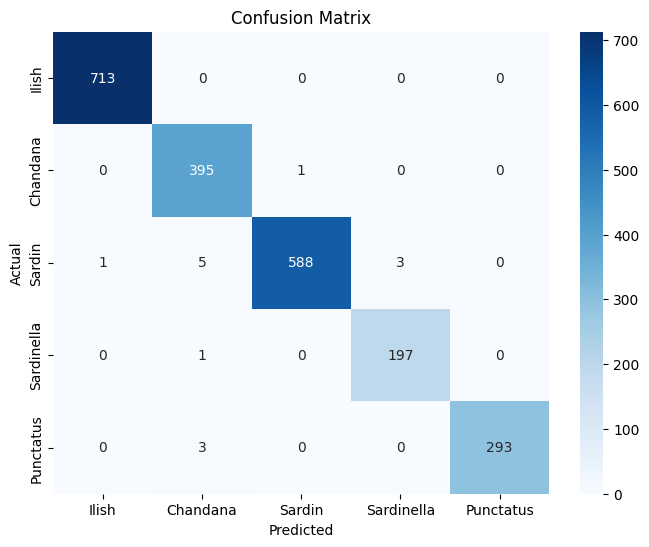

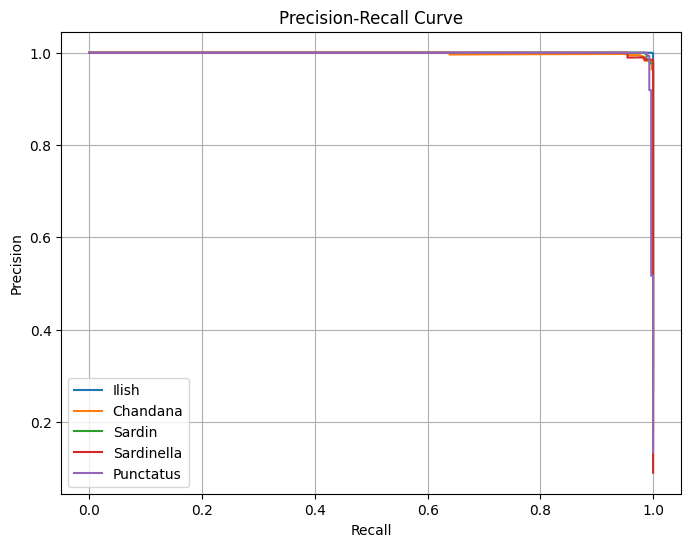

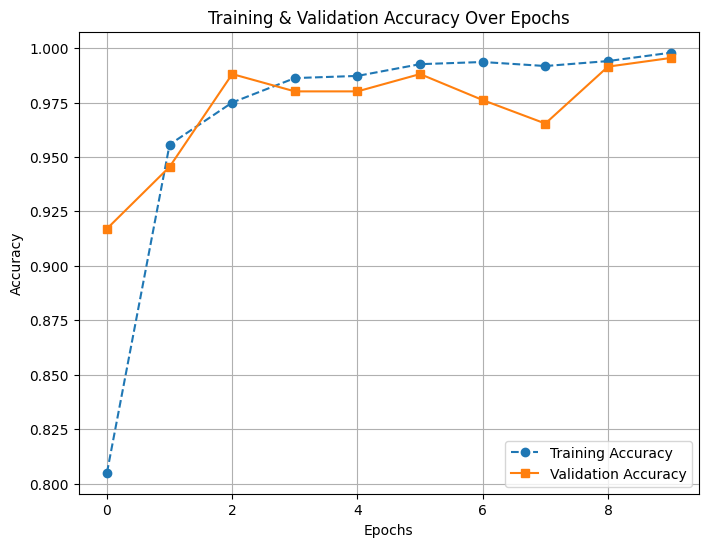

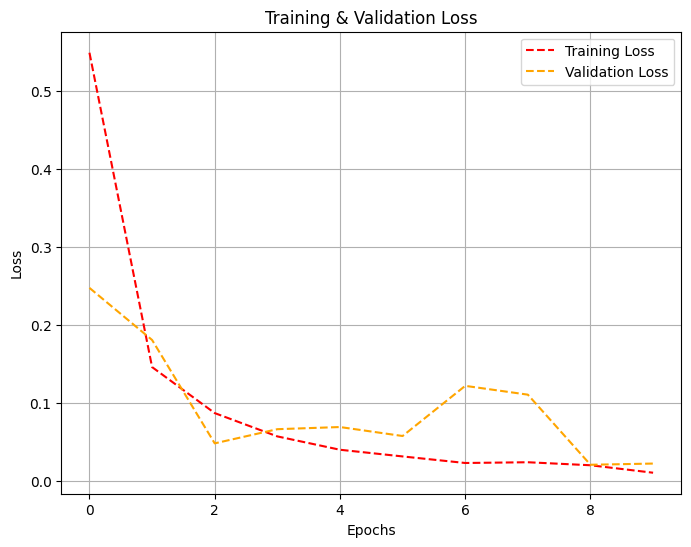

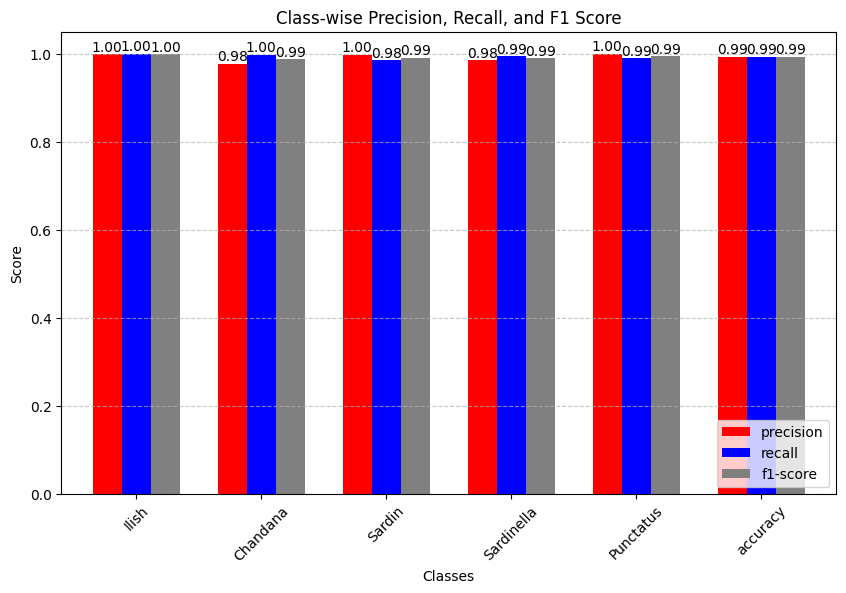


Final Model Performance:
Test Accuracy: 0.9936
F1 Score: 0.9936
Final predictions evaluated.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0, VGG16, MobileNetV2, DenseNet121, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score, classification_report

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
callbacks = [checkpoint, earlystop, reduce_lr]

# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    # for layer in base_model.layers[:-10]:
    #     layer.trainable = False
    # for layer in base_model.layers[-10:]:
    #     layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models for each architecture
models = {
    'ResNet50': create_model(ResNet50),
    'InceptionV3': create_model(InceptionV3)
    # 'EfficientNetB0': create_model(EfficientNetB0)
    # 'VGG16': create_model(VGG16),
    # 'MobileNetV2': create_model(MobileNetV2),
    # 'DenseNet121': create_model(DenseNet121),
    # 'Xception': create_model(Xception)
}

# Train all models and evaluate on validation set
history_dict = {}
model_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    history = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)
    history_dict[model_name] = history
    val_accuracy = history.history['val_accuracy'][-1]
    model_accuracies[model_name] = val_accuracy
    print(f"{model_name} validation accuracy: {val_accuracy:.4f}")

# Calculate weights based on model accuracies
total_accuracy = sum(model_accuracies.values())
model_weights = {model_name: accuracy / total_accuracy for model_name, accuracy in model_accuracies.items()}

# Get predictions from all models (probabilities from softmax)
predictions_prob = {model_name: model.predict(X_test_scaled) for model_name, model in models.items()}

# Weighted average of predictions
weighted_preds_prob = np.zeros_like(next(iter(predictions_prob.values())))

for model_name, pred_prob in predictions_prob.items():
    weighted_preds_prob += model_weights[model_name] * pred_prob

# Get final predicted classes (argmax of weighted probabilities)
final_preds = np.argmax(weighted_preds_prob, axis=1)

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")



#Visualization & Analysis
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, accuracy_score, f1_score

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'{class_labels[i]}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid()
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)
    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])
    df_report = df_report[['precision', 'recall', 'f1-score']]
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Generate Plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print Final Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")
print("Final predictions evaluated.")


#SMOTE (Synthetic Minority Over-sampling Technique)

Synthetic Sample=Original Sample+λ×(Neighbor Sample−Original Sample)
1.Original Sample is the current sample from the minority class.
2.Neighbor Sample is a randomly chosen sample from the k-nearest neighbors.
3.λ is a random value between 0 and 1, which controls the degree of interpolation.


Class distribution after SMOTE: Counter({3: 2800, 0: 2800, 1: 2800, 4: 2800, 2: 2800})
Shape of X_train_resampled: (14000, 224, 224, 3)
Shape of X_test_resampled: (2200, 224, 224, 3)
Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8070 - loss: 0.5379
Epoch 1: val_loss improved from inf to 0.04649, saving model to model.keras
438/438 ━━━━━━━━━━━━━━━━━━━━ 180s 248ms/step - accuracy: 0.8072 - loss: 0.5373 - val_accuracy: 0.9850 - val_loss: 0.0465 - learning_rate: 1.0000e-04
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9811 - loss: 0.0635
Epoch 2: val_loss did not improve from 0.04649
438/438 ━━━━━━━━━━━━━━━━━━━━ 63s 145ms/step - accuracy: 0.9811 - loss: 0.0635 - val_accuracy: 0.9659 - val_loss: 0.1070 - learning_rate: 1.0000e-04
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9830 - loss: 0.0520
Epoch 3: val_loss did not improve from 0.04649
438/438 ━━━━━━━━━━━━━━━━━━━━ 64s 145ms/step - accuracy: 0.9830 - loss: 0.0520 - val_ac

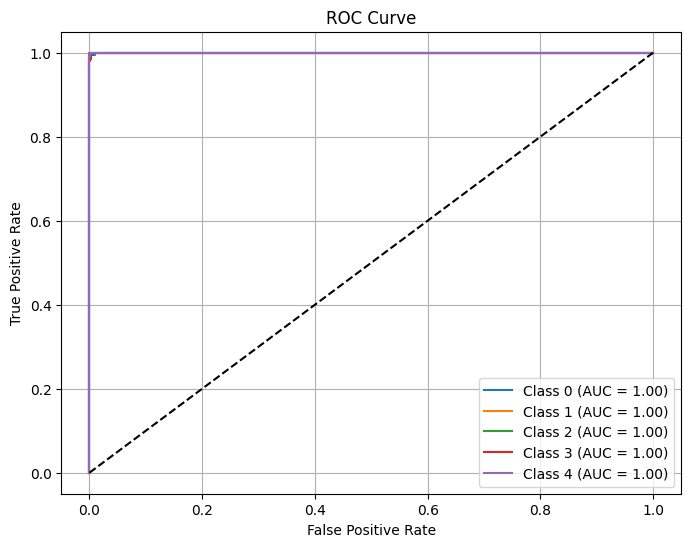

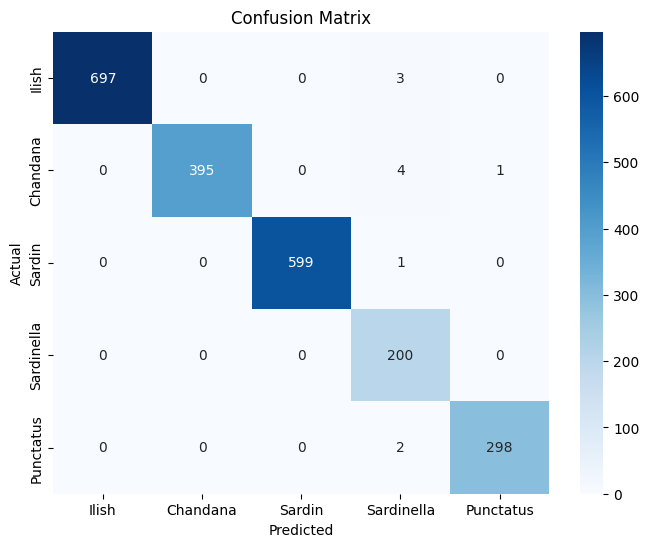

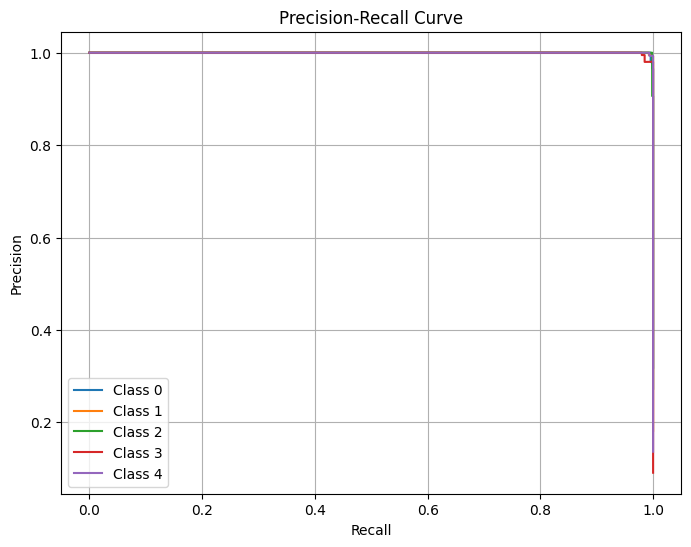

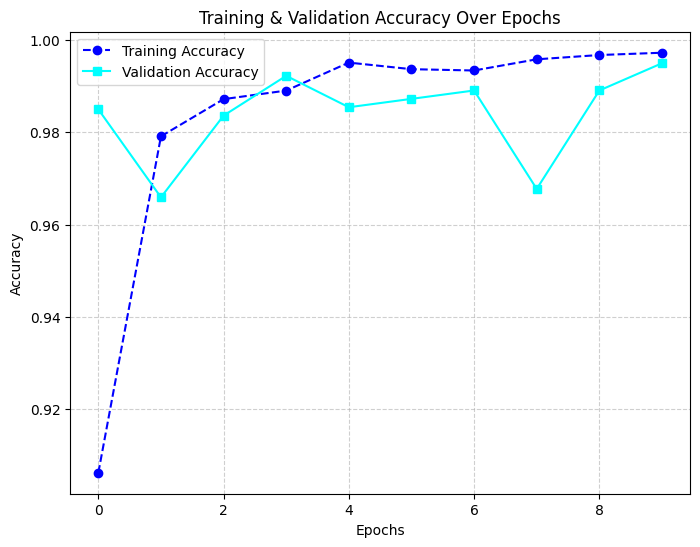

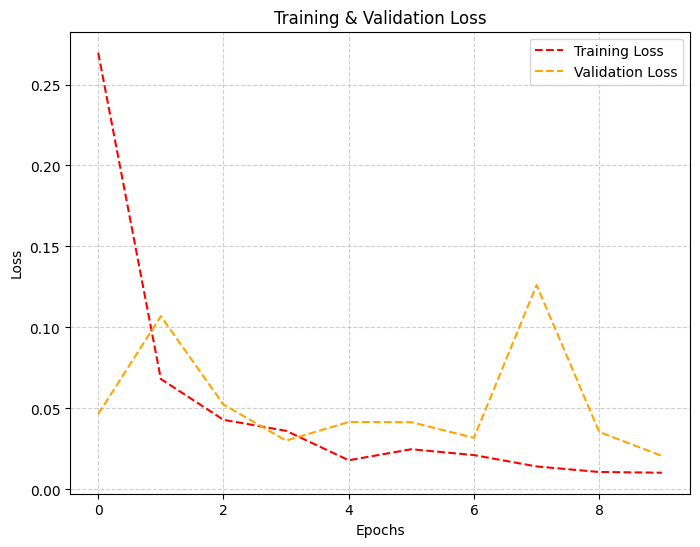

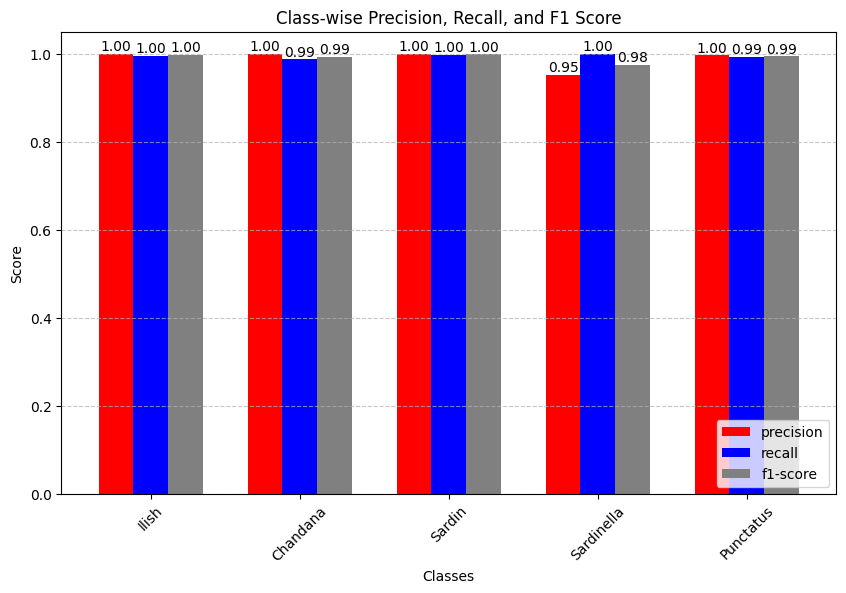


Final Model Performance:
Test Accuracy: 0.9950
F1 Score: 0.9950
Final predictions evaluated.


In [ ]:
!pip install imbalanced-learn


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Assuming X and Y are your image data and labels
# X: image data (e.g., shape=(n_samples, height, width, channels)), Y: labels (0,1,2,3,4 for the 5 classes)

# Split original dataset into train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Flatten the image data (from 4D to 2D)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Apply SMOTE on training data only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_reshaped, Y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

# Reshape back to original 3D shape for the ResNet50 model
# Reshape X_train_resampled and X_test to have the shape (n_samples, 224, 224, 3)
X_train_resampled = X_train_resampled.reshape(-1, 224, 224, 3)
X_test_resampled = X_test_reshaped.reshape(-1, 224, 224, 3)

print(f"Shape of X_train_resampled: {X_train_resampled.shape}")  # Check the new shape
print(f"Shape of X_test_resampled: {X_test_resampled.shape}")  # Check the new shape

# Model Training

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train_resampled, Y_train_resampled,
                    validation_data=(X_test_resampled, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test_resampled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test_resampled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Rest of your evaluation code...


# # Generate Predictions
# Y_test_pred_prob = model.predict(X_test)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

model.save('model_resnet.keras')


In [ ]:
model.save("smote.keras")

#Single Transfer Model Trianing

#CNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.2677 - loss: 23.7782 - val_accuracy: 0.2381 - val_loss: 6.7100
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.3314 - loss: 8.1498 - val_accuracy: 0.3452 - val_loss: 2.4804
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.3726 - loss: 4.2212 - val_accuracy: 0.3619 - val_loss: 1.9424
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.3164 - loss: 2.2395 - val_accuracy: 0.3619 - val_loss: 1.8198
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3250 - loss: 1.5988 - val_accuracy: 0.4000 - val_loss: 1.2915
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


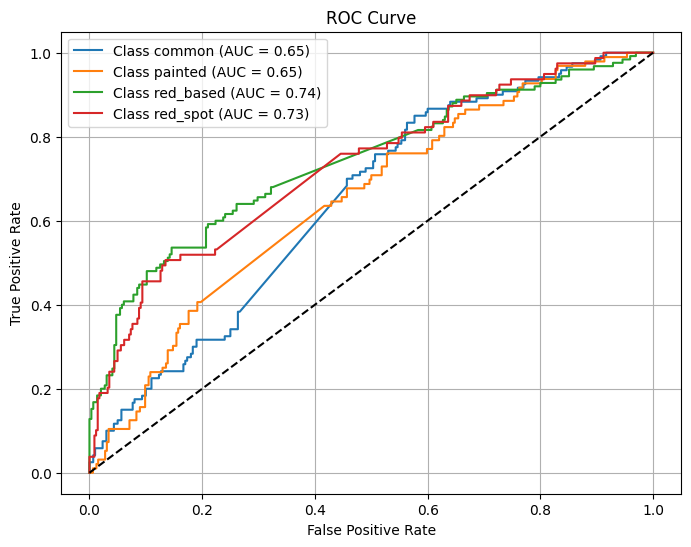

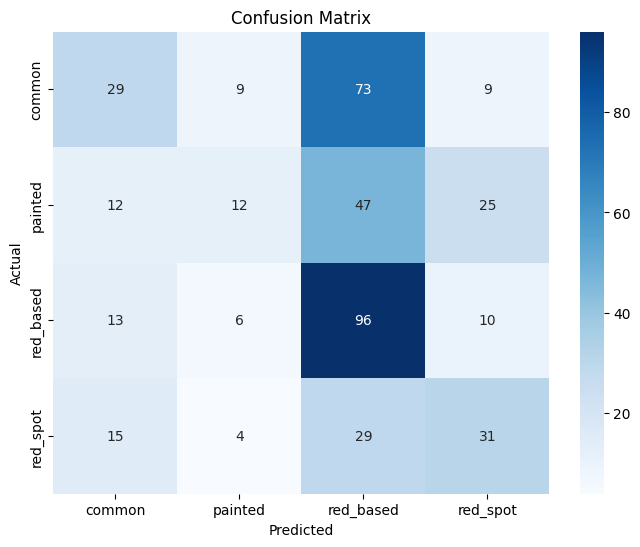

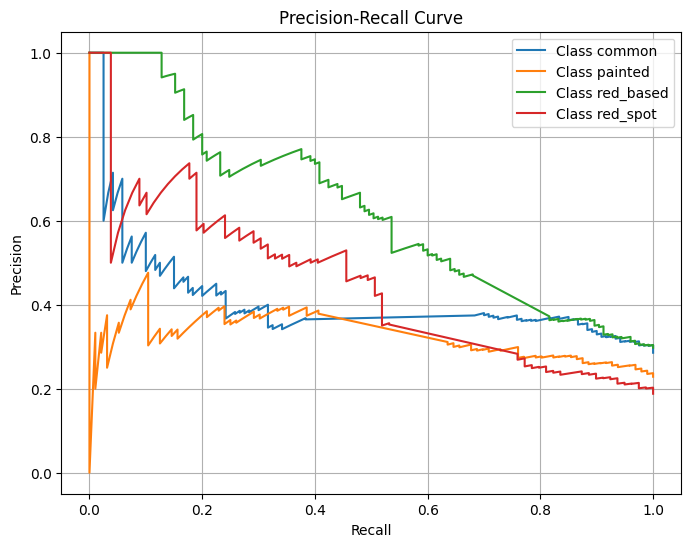

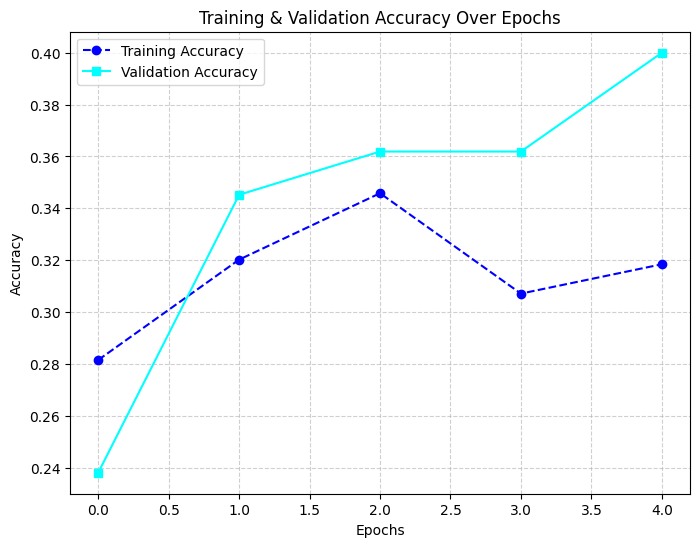

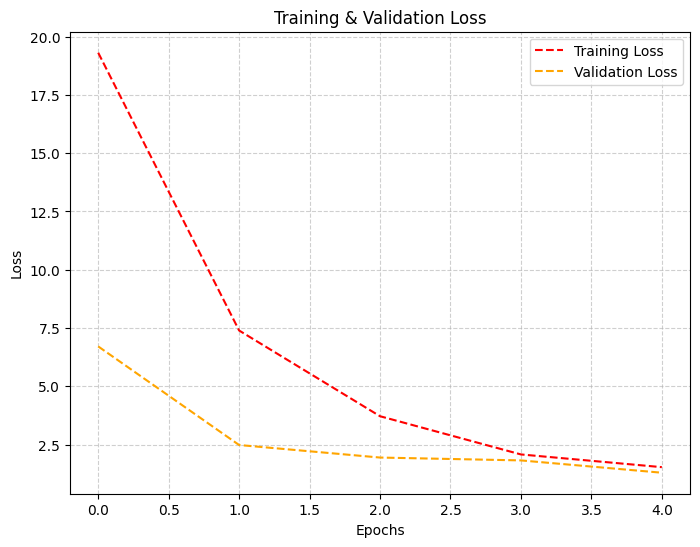

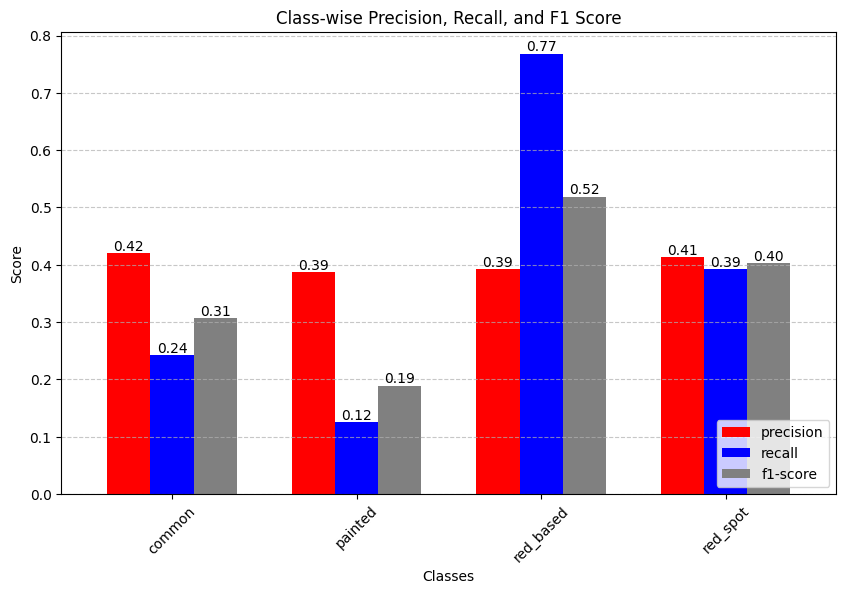


Final Model Performance:
Test Accuracy: 0.4000
F1 Score: 0.3610
Model saved successfully!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define class labels
class_labels = ['common', 'painted', 'red_based', 'red_spot']


# Define Base CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 Classes
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

# Predictions for Evaluation
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# ============================ VISUALIZATIONS ============================

# ROC Curve
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(4):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {class_labels[i]}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])
    df_report = df_report[['precision', 'recall', 'f1-score']]

    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# ============================ Generate Plots ============================

plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print Final Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# Save Model
model.save('butterfly_cnn_model.keras')
print("Model saved successfully!")

#ResNet50

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.4390 - loss: 1.4305
Epoch 1: val_loss improved from inf to 2.00111, saving model to model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.4418 - loss: 1.4237 - val_accuracy: 0.1881 - val_loss: 2.0011 - learning_rate: 1.0000e-04
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.8919 - loss: 0.3061
Epoch 2: val_loss improved from 2.00111 to 1.72378, saving model to model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 409ms/step - accuracy: 0.8922 - loss: 0.3055 - val_accuracy: 0.2857 - val_loss: 1.7238 - learning_rate: 1.0000e-04
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9511 - loss: 0.1640
Epoch 3: val_loss improved from 1.72378 to 1.65616, saving model to model.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 494ms/step - accuracy: 0.9511 - loss: 0.1637 - val_accuracy: 0.2524 - val_loss: 1.6562 - learning_rate: 1.0000e-04
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9742

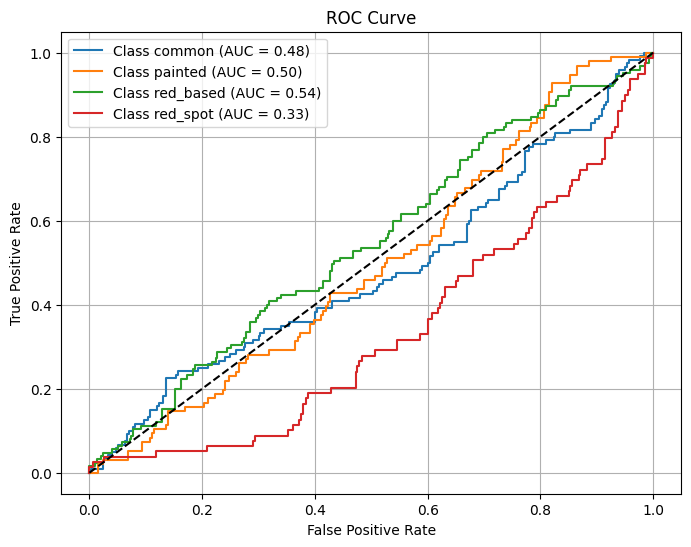

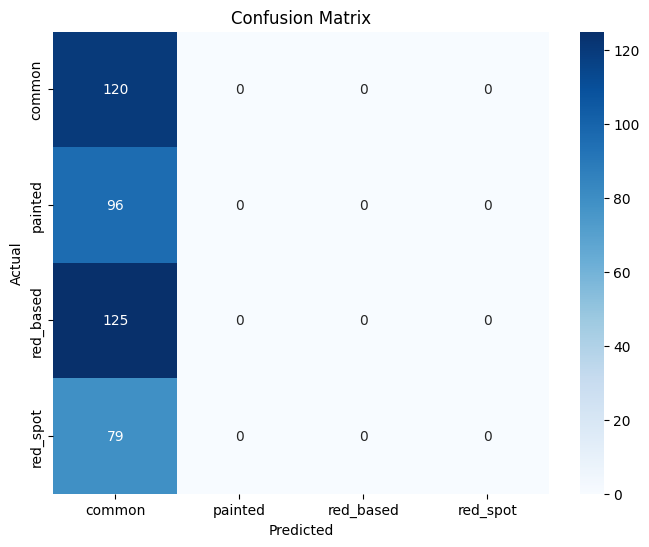

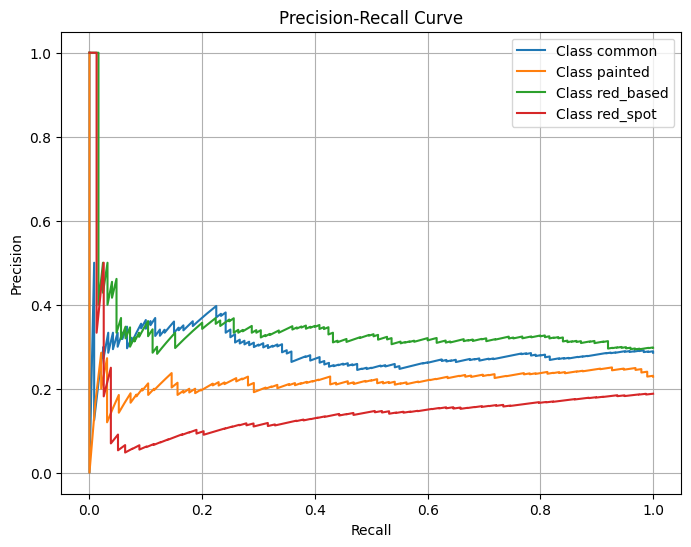

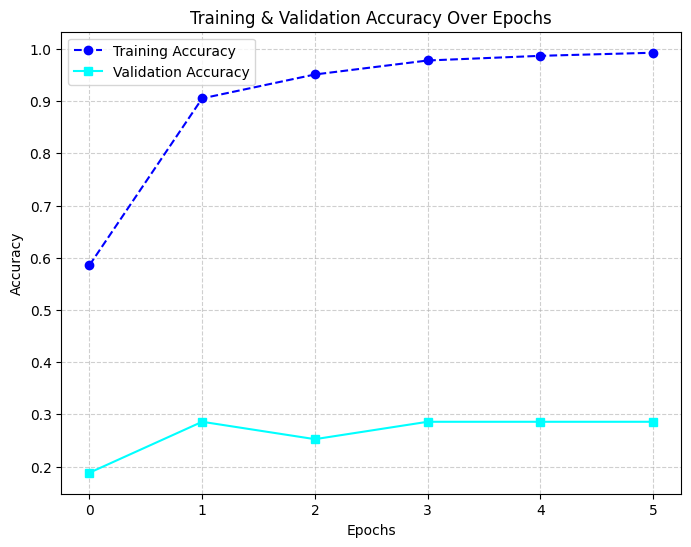

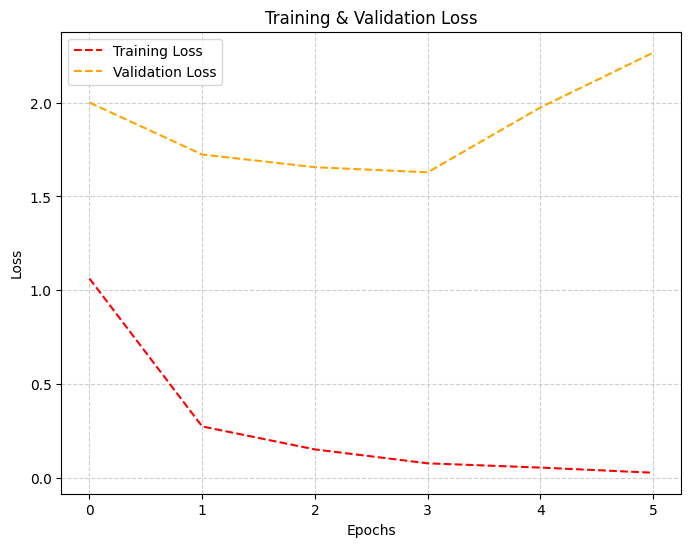

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


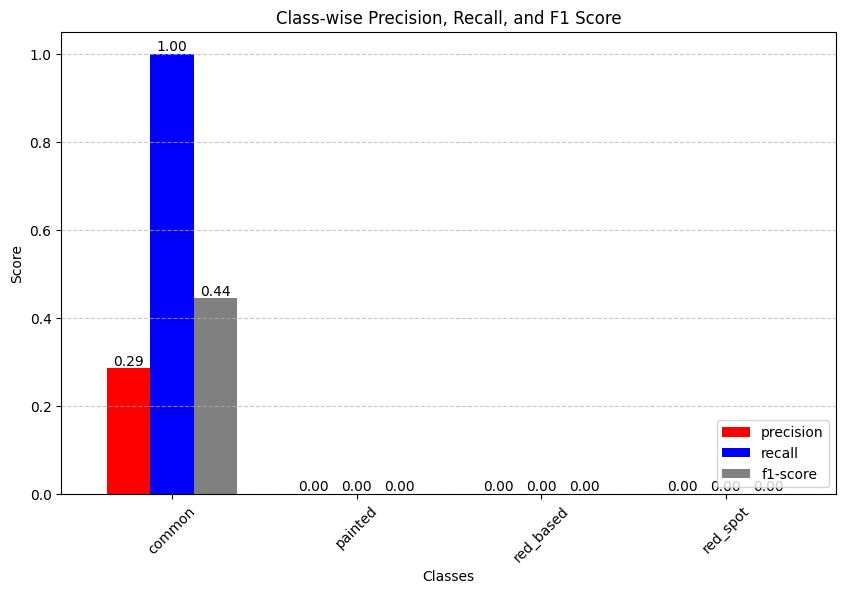


Final Model Performance:
Test Accuracy: 0.2857
F1 Score: 0.1270
Final predictions evaluated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report,precision_recall_curve
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[-20:]:
    layer.trainable = True


# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(4, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train_scaled, Y_train,
                    validation_data=(X_test_scaled, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots
# Define class labels
class_labels = ['common', 'painted', 'red_based', 'red_spot']

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(4):  # Adjusted for 4 classes
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(4):  # Adjusted for 4 classes
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {class_labels[i]}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Generate all plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

# Save model
model.save('model_resnet_butterfly.keras')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train_scaled, Y_train,
                    validation_data=(X_test_scaled, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7631 - loss: 0.6585
Epoch 1: val_loss improved from inf to 6.14701, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.7635 - loss: 0.6572 - val_accuracy: 0.1800 - val_loss: 6.1470 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9596 - loss: 0.1255
Epoch 2: val_loss improved from 6.14701 to 1.94512, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 44s 158ms/step - accuracy: 0.9596 - loss: 0.1254 - val_accuracy: 0.2786 - val_loss: 1.9451 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9850 - loss: 0.0482
Epoch 3: val_loss improved from 1.94512 to 0.64655, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 44s 159ms/step - accuracy: 0.9850 - loss: 0.0482 - val_accuracy: 0.8195 - val_loss: 0.6465 - learning_rate: 1.0000e-04
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step -

#EfficientNetB0

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6188 - loss: 1.0592
Epoch 1: val_loss improved from inf to 0.07323, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 126s 130ms/step - accuracy: 0.6195 - loss: 1.0573 - val_accuracy: 0.9755 - val_loss: 0.0732 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9653 - loss: 0.1058
Epoch 2: val_loss improved from 0.07323 to 0.04252, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.9653 - loss: 0.1058 - val_accuracy: 0.9864 - val_loss: 0.0425 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9803 - loss: 0.0563
Epoch 3: val_loss improved from 0.04252 to 0.02860, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9803 - loss: 0.0563 - val_accuracy: 0.9877 - val_loss: 0.0286 - learning_rate: 1.0000e-04
Epoch 4/1

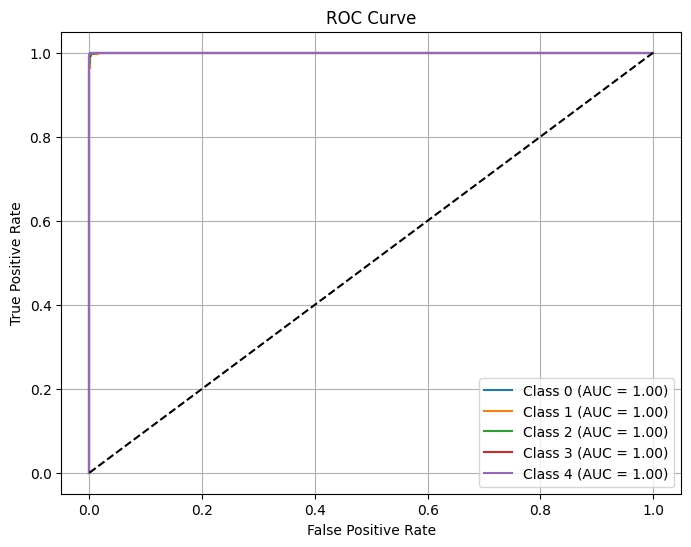

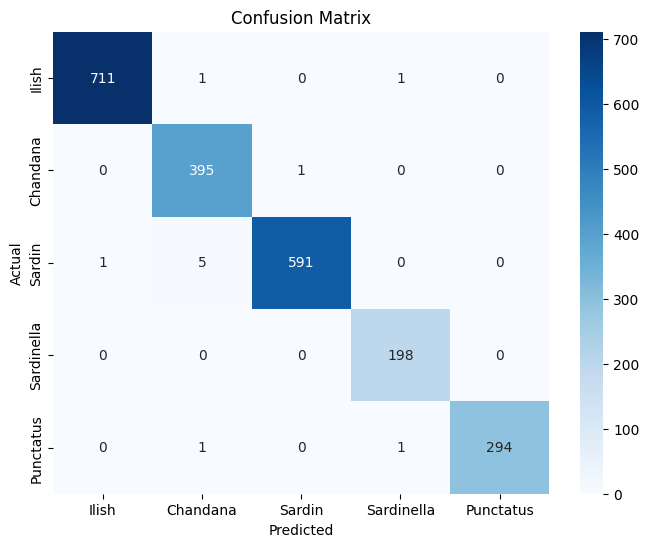

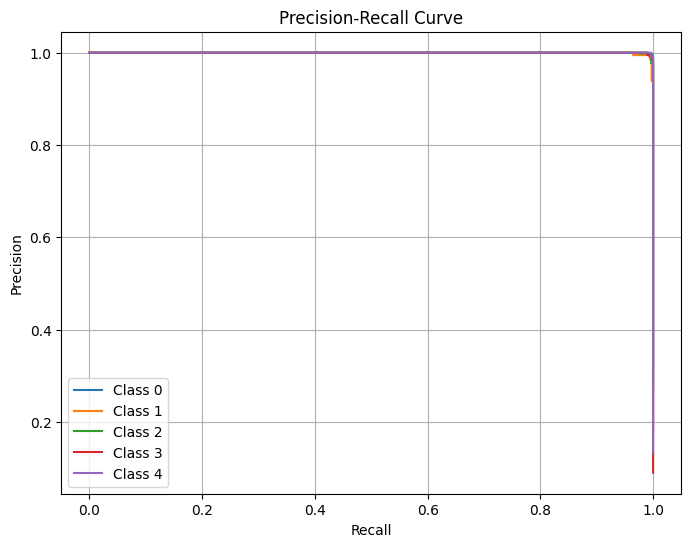

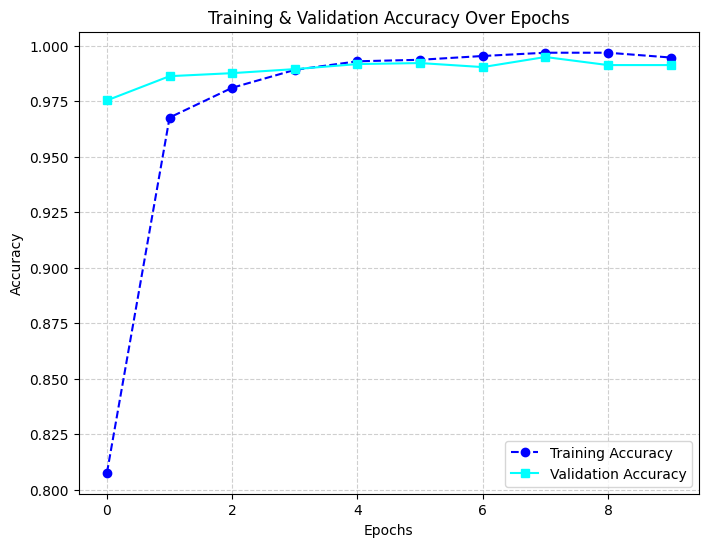

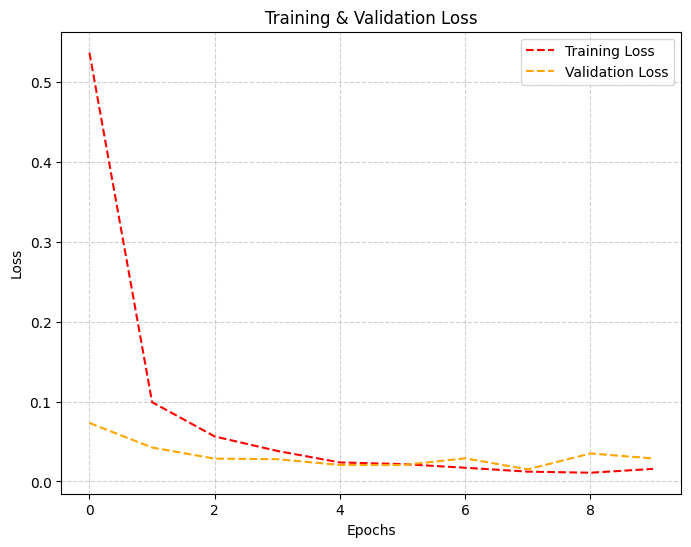

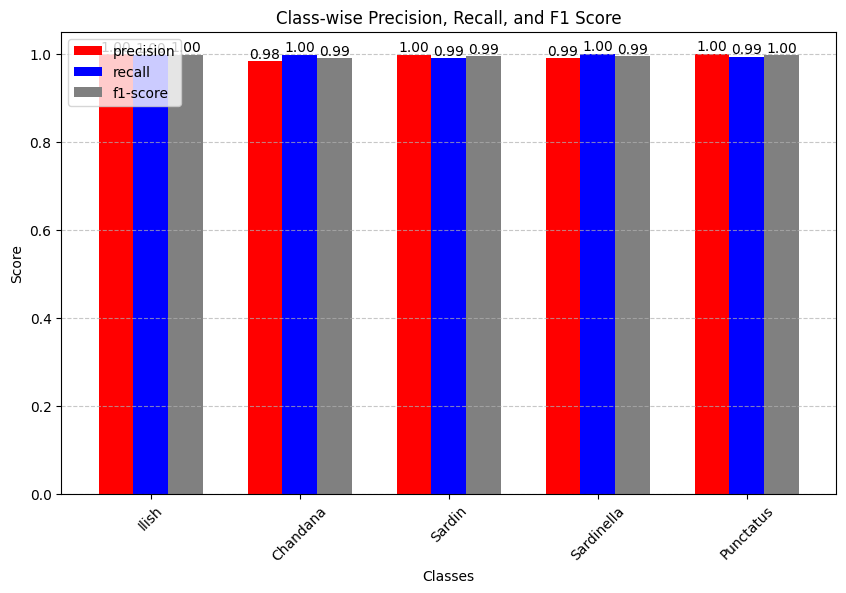


Final Model Performance:
Test Accuracy: 0.9950
F1 Score: 0.9950
Final predictions evaluated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

#InceptionV3

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7387 - loss: 0.7286
Epoch 1: val_loss improved from inf to 0.11232, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 123s 144ms/step - accuracy: 0.7392 - loss: 0.7272 - val_accuracy: 0.9636 - val_loss: 0.1123 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9701 - loss: 0.0883
Epoch 2: val_loss improved from 0.11232 to 0.05392, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - accuracy: 0.9701 - loss: 0.0883 - val_accuracy: 0.9832 - val_loss: 0.0539 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9864 - loss: 0.0412
Epoch 3: val_loss improved from 0.05392 to 0.03985, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - accuracy: 0.9864 - loss: 0.0412 - val_accuracy: 0.9855 - val_loss: 0.0398 - learning_rate: 1.0000e-04
Epoch 4/1

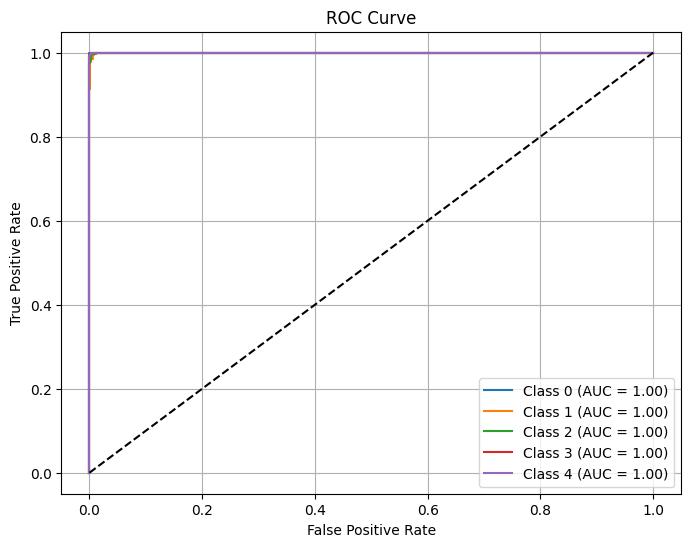

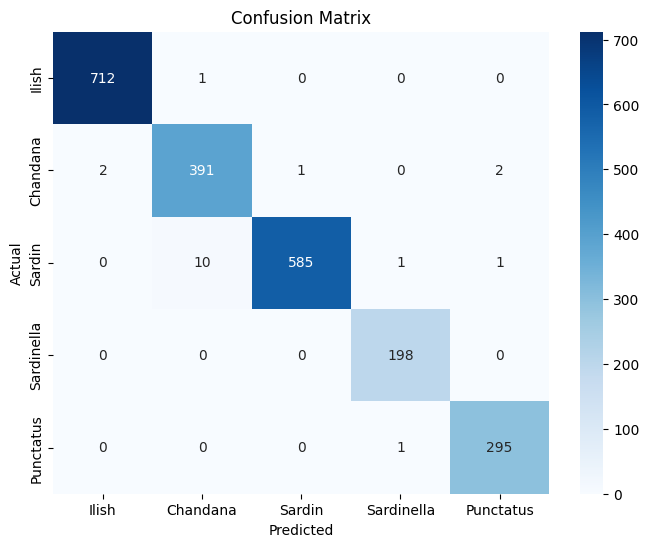

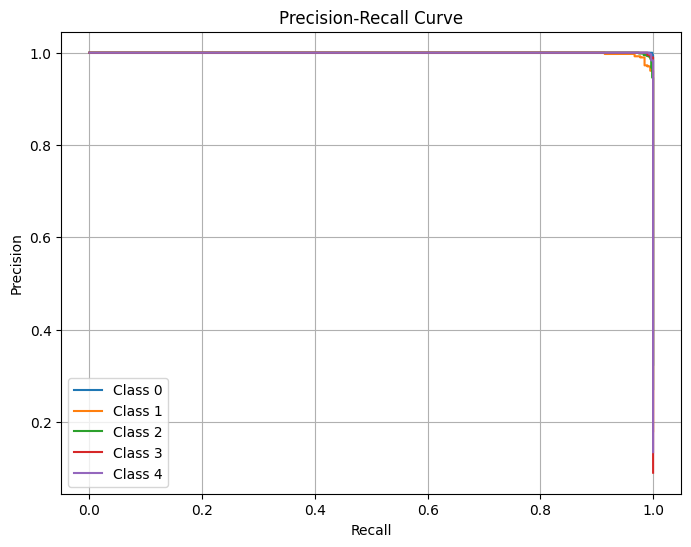

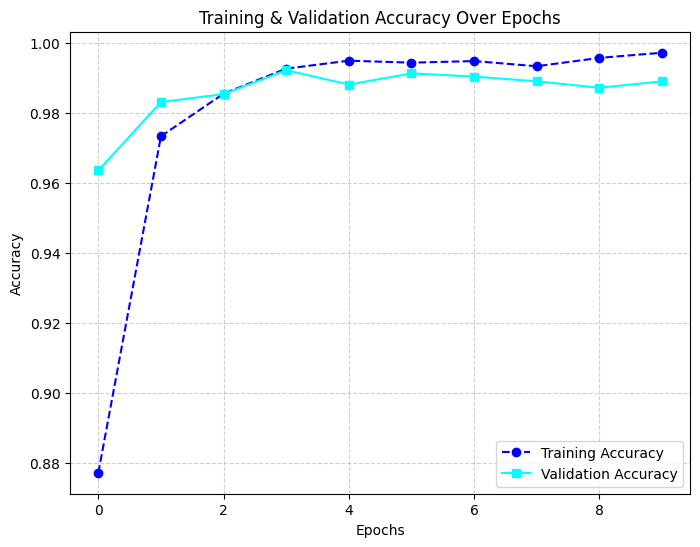

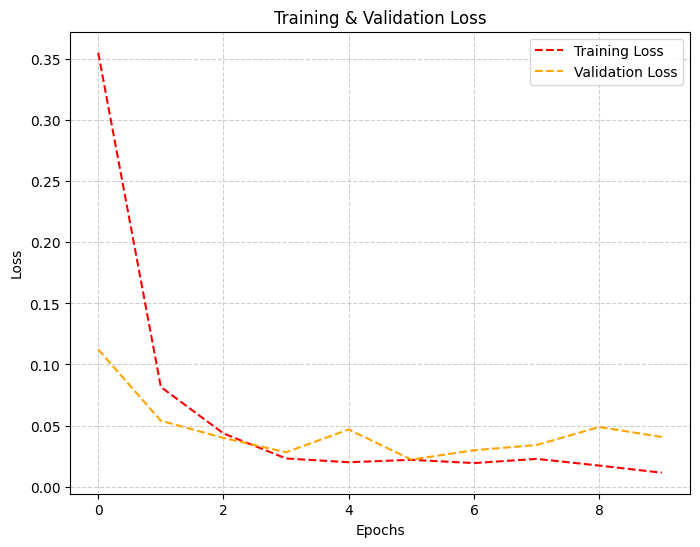

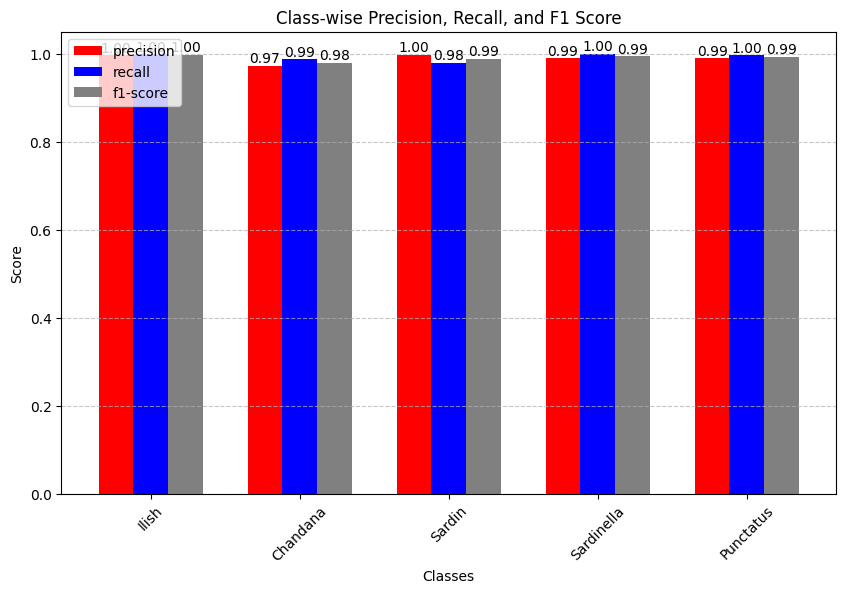


Final Model Performance:
Test Accuracy: 0.9914
F1 Score: 0.9914
Final predictions evaluated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

#MobileNetV2

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6957 - loss: 0.8698
Epoch 1: val_loss improved from inf to 2.53476, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.6963 - loss: 0.8682 - val_accuracy: 0.4705 - val_loss: 2.5348 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9681 - loss: 0.0940
Epoch 2: val_loss improved from 2.53476 to 0.68906, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.9681 - loss: 0.0939 - val_accuracy: 0.7755 - val_loss: 0.6891 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9778 - loss: 0.0621
Epoch 3: val_loss improved from 0.68906 to 0.16901, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.9778 - loss: 0.0620 - val_accuracy: 0.9377 - val_loss: 0.1690 - learning_rate: 1.0000e-04
Epoch 4/10
27

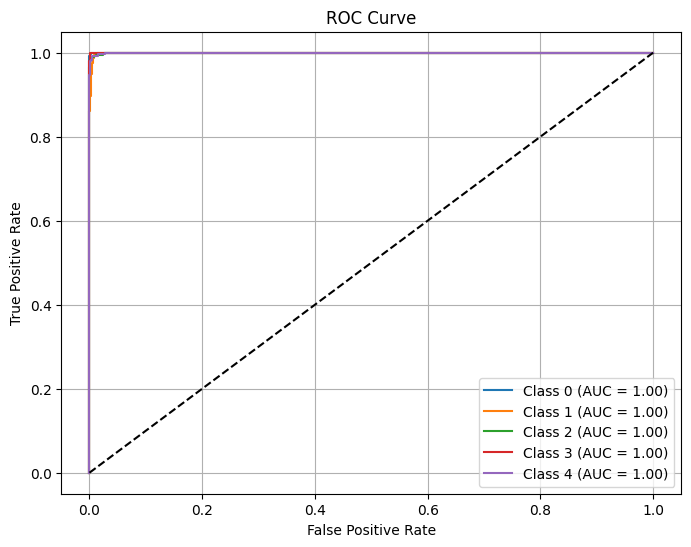

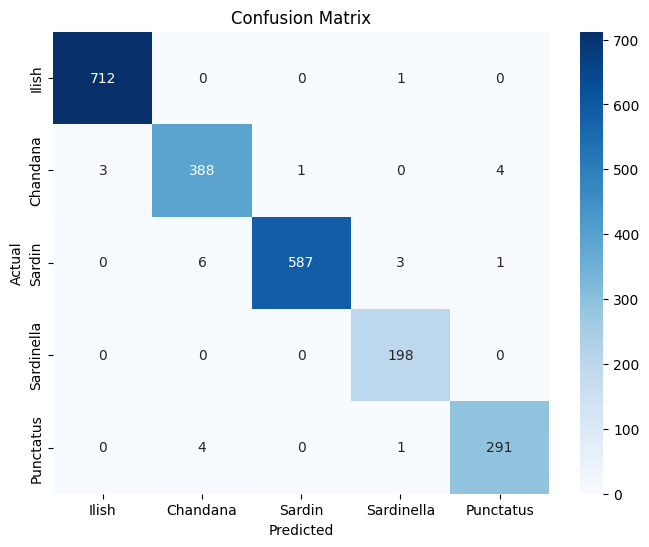

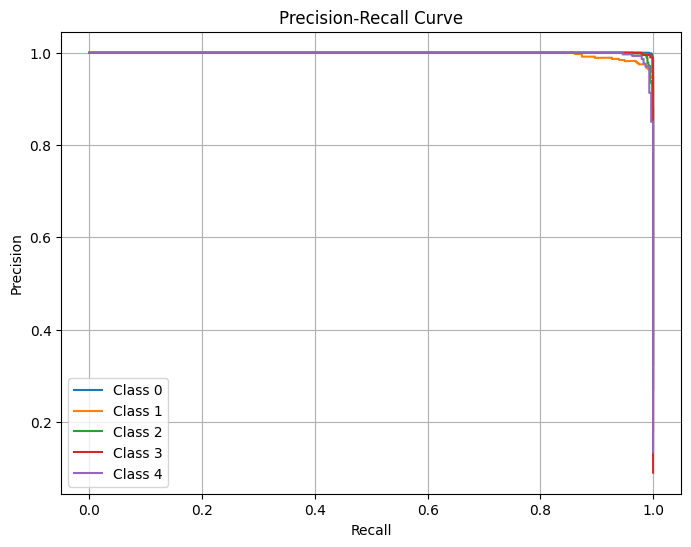

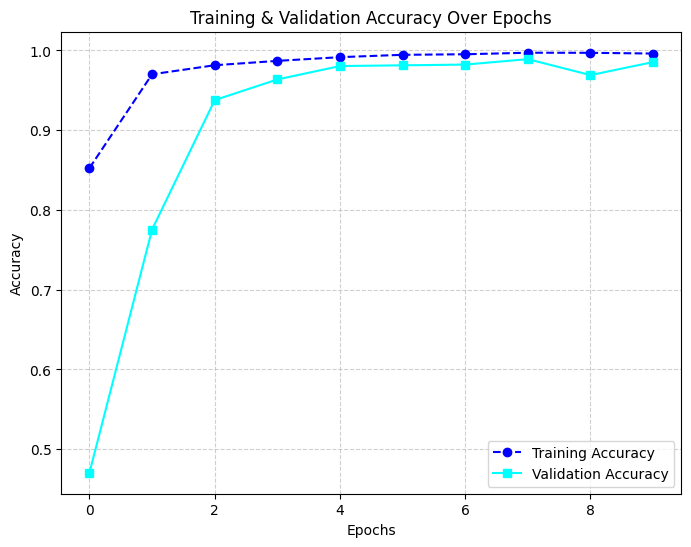

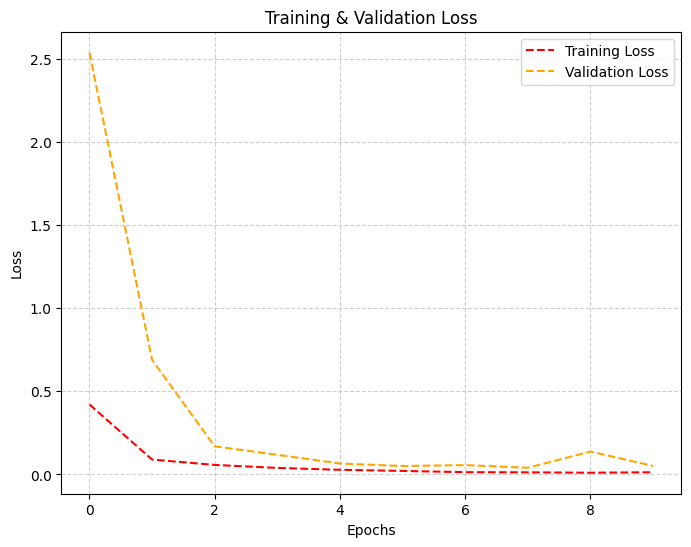

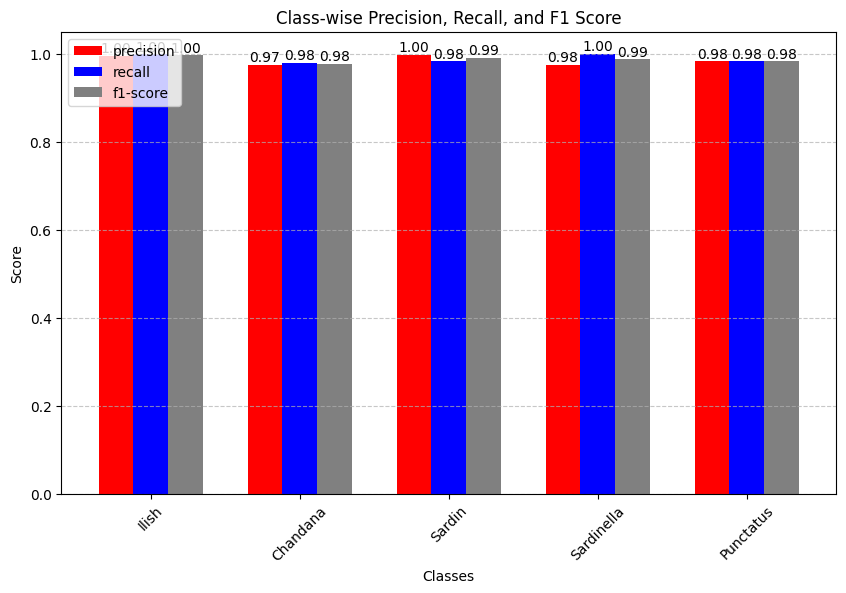


Final Model Performance:
Test Accuracy: 0.9891
F1 Score: 0.9891
Final predictions evaluated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

#VGG-19

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.5926 - loss: 1.1512
Epoch 1: val_loss improved from inf to 1.45339, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 140s 374ms/step - accuracy: 0.5932 - loss: 1.1496 - val_accuracy: 0.6395 - val_loss: 1.4534 - learning_rate: 1.0000e-04
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9245 - loss: 0.2497
Epoch 2: val_loss improved from 1.45339 to 0.85835, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 85s 309ms/step - accuracy: 0.9246 - loss: 0.2496 - val_accuracy: 0.7586 - val_loss: 0.8584 - learning_rate: 1.0000e-04
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9645 - loss: 0.1218
Epoch 3: val_loss improved from 0.85835 to 0.21431, saving model to model.keras
275/275 ━━━━━━━━━━━━━━━━━━━━ 85s 309ms/step - accuracy: 0.9645 - loss: 0.1218 - val_accuracy: 0.9318 - val_loss: 0.2143 - learning_rate: 1.0000e-04
Epoc

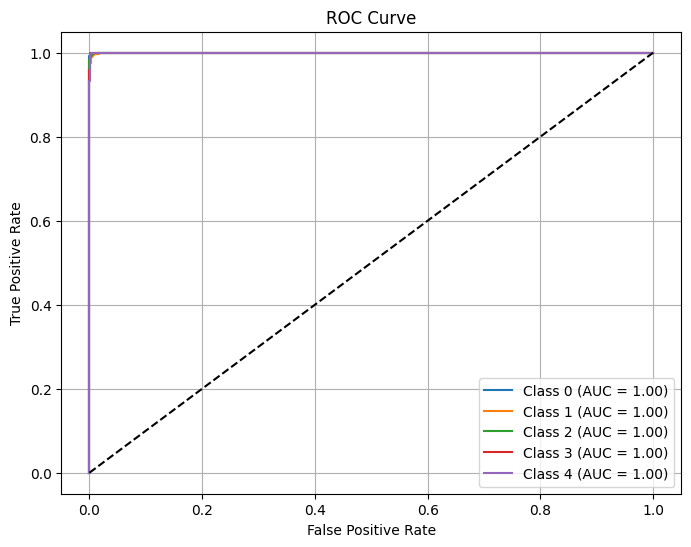

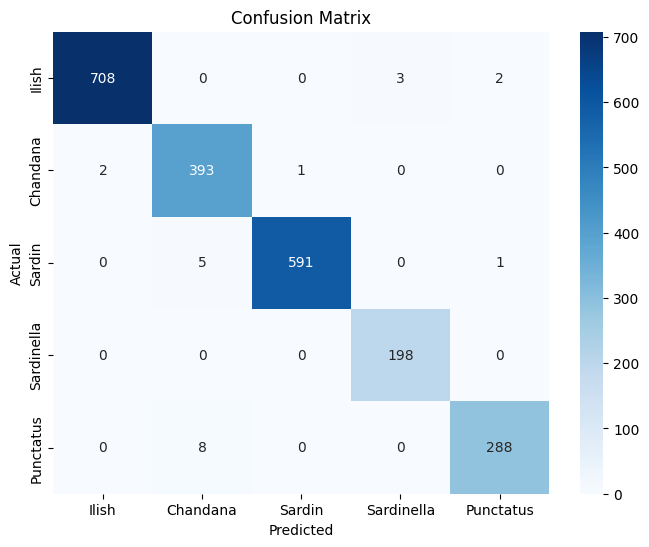

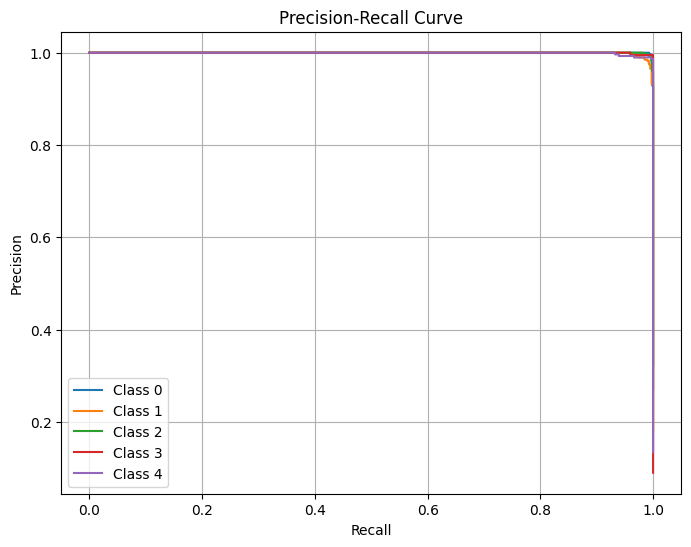

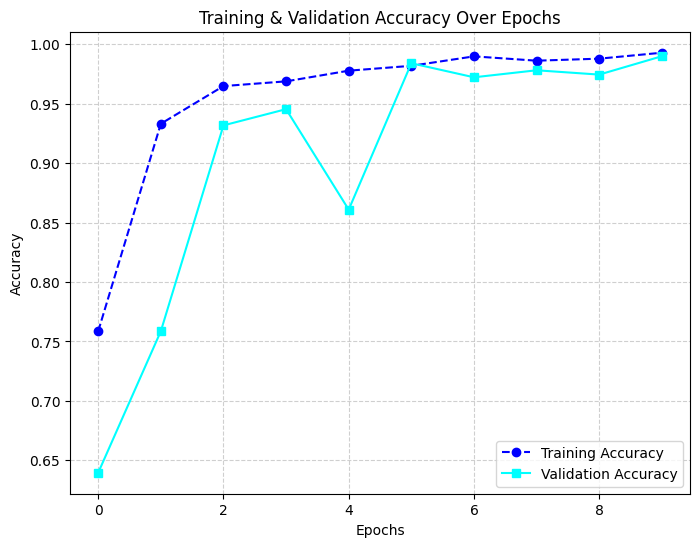

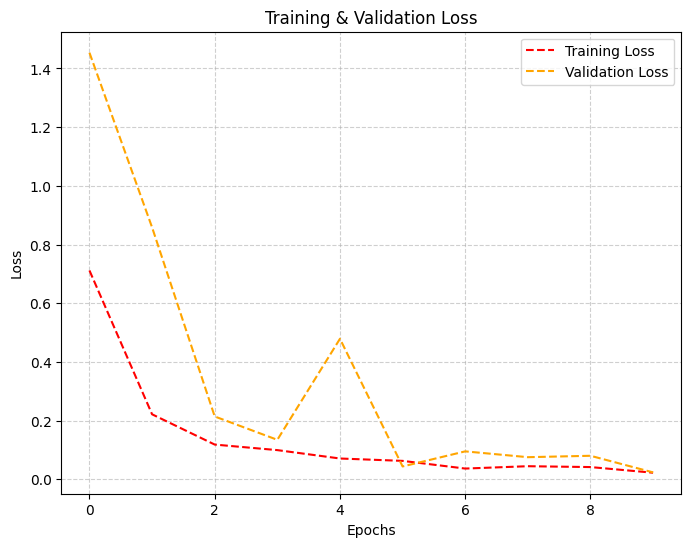

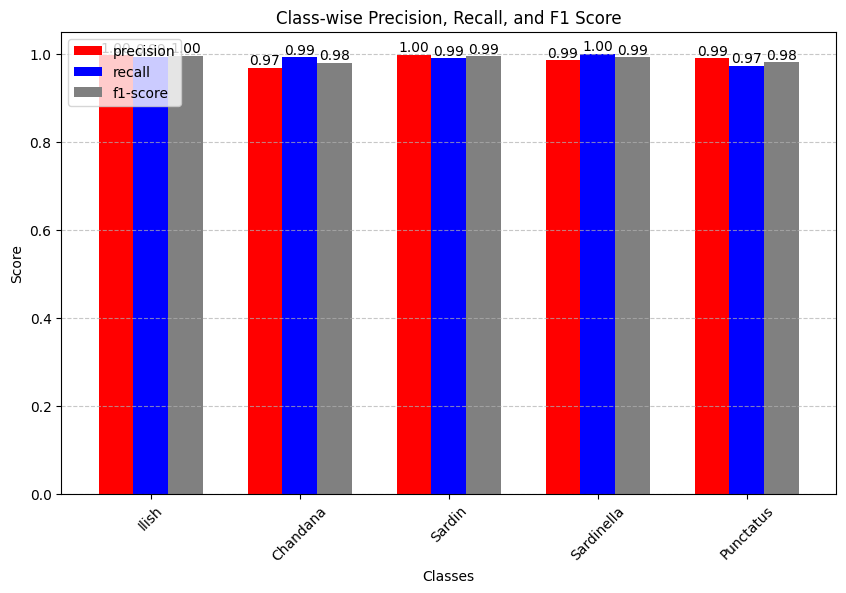


Final Model Performance:
Test Accuracy: 0.9900
F1 Score: 0.9900
Final predictions evaluated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd

# Initialize ResNet50 model with transfer learning (keeping its layers frozen)
input_shape = (224, 224, 3)
# from tensorflow.keras.applications import
# [
# ResNet50, ResNet101, ResNet152,
# EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
# VGG16, VGG19,
# Xception,
# InceptionV3, InceptionResNetV2,
# DenseNet121, DenseNet169, DenseNet201,
# MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large,
# NASNetLarge, NASNetMobile
# ]
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers of ResNet50 to use as a feature extractor
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Adjust learning rate if necessary
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels
# class_labels = [f'Class {i}' for i in range(5)]
class_labels=['Ilish','Chandana','Sardin','Sardinella','Punctatus']

# Custom callback to track learning rate during training
class LRSchedulerCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'lr' not in self.model.history.history:
            self.model.history.history['lr'] = []
        self.model.history.history['lr'].append(self.model.optimizer.lr.numpy())

# Function to display individual plots

# ROC Curve Plot
def plot_roc_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(Y_test, Y_test_pred, class_labels):
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(8, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve((Y_test == i).astype(int), Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Training & Validation Accuracy Plot
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue',linestyle='dashed', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', marker='s')
    plt.title('Training & Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Training & Validation Loss Plot
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', linestyle='dashed', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', color='orange')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Learning Rate Scheduler Plot
def plot_learning_rate(history):
    if 'lr' in history.history:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['lr'], label='Learning Rate', color='purple')
        plt.title('Learning Rate Scheduler')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Class-wise Precision, Recall, F1 Score Plot with Values
def plot_classwise_metrics(Y_test, Y_test_pred, class_labels):
    report = classification_report(Y_test, Y_test_pred, target_names=class_labels, output_dict=True)

    # Remove overall accuracy key
    if 'accuracy' in report:
        report.pop('accuracy')

    df_report = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg'])  # Remove avg rows
    df_report = df_report[['precision', 'recall', 'f1-score']]  # Keep relevant columns

    # Define colors for bars
    colors = {'precision': 'red', 'recall': 'blue', 'f1-score': 'gray'}

    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df_report.plot(kind='bar', ax=ax, width=0.7, color=[colors[col] for col in df_report.columns])

    # Annotate bars with values in normal font
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', color='black')

    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.xticks(rotation=45)

    # Move legend inside the plot (upper left)
    plt.legend(loc='upper left', frameon=True)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Generate all individual plots
plot_roc_curve(Y_test, Y_test_pred_prob, class_labels)
plot_confusion_matrix(Y_test, Y_test_pred, class_labels)
plot_precision_recall_curve(Y_test, Y_test_pred_prob, class_labels)
plot_accuracy(history)
plot_loss(history)
plot_learning_rate(history)
plot_classwise_metrics(Y_test, Y_test_pred, class_labels)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final predictions evaluated.")

In [ ]:
# model.save('efficientnetb0.h5')

#End